## Data processing

If those files that contain collected traces are existed and in the right path, you could execute the following code to load them, instead of waiting for another 24 hours collection process.

In [1]:
%matplotlib notebook
import numpy as np
import os
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import matplotlib.pylab as plt
import random


trace_array = []
text_out_array = []

for n in range(0,20):
    trace_array.append(np.load(r"D:\DCPA\trace\F\trace_part{0}.npy".format(n),allow_pickle=True))
    text_out_array.append(np.load(r"D:\DCPA\trace\F\trace_part{0}_c.npy".format(n),allow_pickle=True))

In [2]:
print(np.shape(trace_array))
print(trace_array[0][0])

(20, 500, 217300)
[-5.1576281  -2.45368816  4.15509507 ...  4.68001343  3.07779168
 -0.47608875]


# !Legacy code, run it just for variable name XD

In [8]:
indices_to_remove = []

def remove_elements_at_indices(lst, indices):
    sorted_indices = sorted(indices, reverse=True)
    if len(indices) == 0:
        return lst
    
    for index in sorted_indices:
        if 0 <= index < len(lst):
            del lst[index]
        else:
            print(f"Warning: Index {index} is out of range and will be ignored.")
            
    return lst

In [9]:
trace_array_d = []
text_out_array_d = []

for i in range(0,20):
    trace_array_d += remove_elements_at_indices(list(trace_array[i]),indices_to_remove)
    text_out_array_d += remove_elements_at_indices(list(text_out_array[i]),indices_to_remove)

In [5]:
#print(trace_array[0])
#print(trace_array[0][0])
#print(len(trace_array[0]))

print(np.shape(trace_array_d))
num_traces = np.shape(trace_array_d)[0]
num_points = np.shape(trace_array_d)[1]
#print(text_out_array_d)

(10000, 217300)


<IPython.core.display.Javascript object>


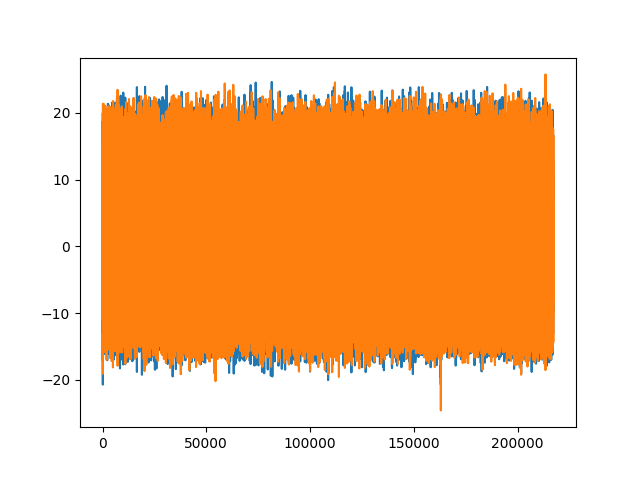

In [6]:
plt.plot(trace_array_d[0])
plt.plot(trace_array_d[1])

In [7]:
print(text_out_array[0])
print(len(text_out_array))

[[218 211 150 ... 107  65  23]
 [179  21 135 ... 155 248 158]
 [203 192   7 ... 123  82 183]
 ...
 [224 129 239 ...  59  78  83]
 [ 63  39  41 ...  55  83 168]
 [ 53  37  50 ...   1 169 241]]
20


In [4]:
trace_array_d = [[row[:210000] for row in trace_array_d]][0]
print(np.shape(trace_array_d))

(10000, 210000)


# !Legacy code ↑

## Set c_tilde and c

In [10]:
import numpy as np
from tqdm import trange
import numba as nb
import time
import sys
sys.path.append(r"D:\Demonstrate\Dilithium\attack_show\dilithium-py-main")
sys.path.append(r"D:\Github\Python_Dilithium") ## 注意这里
from dilithium import Dilithium,DEFAULT_PARAMETERS
from params import *
from packing import *
from polyvec import *
from poly import *
from os import urandom
from symmetric import *
from fips202 import *

D = Dilithium(DEFAULT_PARAMETERS["dilithium2"])
g.set_mode(2)

c_tilde_array = text_out_array_d
#print(c_tilde_array)
c_array = [0] * len(c_tilde_array)
c = poly()
for i in range(0,len(c_tilde_array)):
    c_tilde = c_tilde_array[i]
    #print(c_tilde)
    #print(i)
    poly_challenge(c,c_tilde)
    #print(c.coeffs)
    poly_ntt(c)
    q = c.coeffs
    #print(q)
    c_array[i] = q.copy()

In [3]:
def hw_cal(t):
    return bin(t).count("1")

In [ ]:
# legacy code
HW = [bin(n).count("1") for n in range(10000000)]

In [4]:
import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [5]:
QINV = 58728449

def dilithium_internal(c,sguess):
    a = c * sguess
    t = (a*QINV)%(2**32)
    t = (a - t*g.Q) >> 32
    t += g.Q
    if t > (g.Q>>1):
        t -= g.Q
    return t

point 1

In [6]:
QINV = 58728449

def dilithium_internal_1(c, sguess):
    a = c * sguess
    #t = (a * QINV) % (2 ** 32)
    #t = (a - t * g.Q) >> 32
    #t += g.Q

    #if t > (g.Q >> 1):
        #t -= g.Q
    t = a
    #Split t into four 8-bit integers (in the order of LSB,MLSB,MMSB,MSB)
    #t_list = [(t >> (i * 8)) & 0xFF for i in range(4)]
    
    res = t & 0xFFF

    return res

point 2

In [13]:
QINV = 58728449

def dilithium_internal_2(c, sguess):
    a = c * sguess
    t = (a * QINV) % (2 ** 32)
    t = (a - t * g.Q) >> 32
    t += g.Q

    if t > (g.Q >> 1):
        t -= g.`Q
    p = 12
    #Split t into four 8-bit integers (in the order of LSB,MLSB,MMSB,MSB)
    #t_list = [(t >> (i * 8)) & 0xFF for i in range(4)]
    
    t_list = [(t >> (i * p)) & ((1 << p) - 1) for i in range((32 // p) + bool(32 % p))]

    return t_list

Spoiler: this is the correct s1 after ntt.

In [14]:
s1P = "13748884 8505872 3576967 3139465 -3306624 -723818 3463269 4591809 5913996 9988772 5403019 5543657 12609391 15852327 11890448 14273206 6876875 8172321 -1199150 -335586 6395040 5911946 17739799 11092907 3469574 10400384 3329771 8129731 6569987 13987371 16741354 10173212 -4007787 -476793 -5160209 2695745 6230173 -1391497 8652937 12265015 -2384497 2244999 4490077 2431757 -6319602 -11413460 -4454961 3401223 -3747133 4250021 -2625054 -8680502 -2371270 4383580 8129218 452980 -1526430 2608174 -3654381 -7150963 -3750449 3548535 -6228994 -4268452 -1065837 713013 4025485 5732047 3296876 8860208 7951267 11990997 -476966 2954716 5199194 4278688 -8311618 -363626 2059345 2575523 15429091 19835239 9389034 10252628 10915431 9122263 2130521 6217065 2348748 3539388 2382510 13686 5378847 5732247 11330119 4250239 4587960 3884308 -4885634 -2402010 -3520664 1347748 8229228 4269832 308833 2114201 475056 -4989102 11272277 9065875 3445645 5181887 4845107 1590719 -8972423 -1077447 5880016 -593488 -1408678 1598202 3757950 8401178 -876944 3544676 1988972 -383706 2466201 2314097 -7888138 -718184 2470616 386462 -3807489 3083575 -4909387 184393 -7107772 -13972676 -4996259 -4747053 -4383694 -9332502 -9451643 -7425225 1506853 4759747 -2657329 -400315 -11298916 -3448338 1236949 -4644611 -263077 1877905 884618 8807298 11246935 5033863 146474 7271432 3343942 5213022 1006329 -1783697 -6594982 -9278248 -2234957 -6515561 -10609275 -9294803 -2886597 -5669169 1045085 1492635 467073 543299 -3177196 -10653858 -11494785 -15510789 -11806173 -8902401 -10467822 -18553576 -8135401 -11581023 -5158364 -4715080 -3844620 4041660 -7240160 -6587324 9601960 4402350 6494955 3796439 -2142213 910671 -3423746 2925960 -685189 4420121 9711312 1462460 3983698 -1409902 7407295 2382245 -2645877 2802365 -7966364 -4133408 -5508629 1025277 -8675988 -2728160 -1841102 -6534042 1523927 -779931 -1508246 -3335684 -2379874 -2233288 -8109984 -5559420 -2369067 -7693773 563147 -1689053 -6231812 -5190374 -9987167 -9109171 -14282180 -5927338 -9060305 -13390283 -10881243 -14158377 3006409 -5343617 -7123697 -496499 -5949203 -2355941 -6376121 -3324211 -9592318 -14121258 -7643420 -3804536 -14336583 -7112707 -10722529 -15693129 1470684 7507194 -5690286 1193668 7262224 10446844 1114857 413967 1992595 2752971 -5611265 -6127241 2431978 -1042534 8906094 8632170 3445978 11201516 6374476 -1279898 3429571 -2722005 4778261 8242101 -1454412 -219992 697281 -2237281 -4439229 -4419119 -214705 -376207 3449614 -500972 -3664179 -6056235 -8649546 -5242852 -5718873 -6069237 6169957 -821901 1415291 7148965 -252655 6594761 -2494072 567086 1085154 -6837772 -2327322 -10482208 -5759993 -5945901 -10454774 -2091904 -7984872 -5445872 -17756239 -9900193 -2651934 -2841534 -6622537 -1190531 2289909 -4800433 -276550 -3188894 -10484347 -3277539 -4850184 3234966 -8833272 -9319688 -2504351 601207 3809007 3843627 3140400 222622 5078241 1097563 567524 -6122688 1375578 -3107486 -3565526 -10628086 -6723311 -9643391 -3938857 -4073013 -5699050 -584302 1604461 -257481 -2141841 924423 -1823420 -6135562 -2046261 -5387027 -3367773 3463189 11945514 9044460 2500787 3071447 300593 -6818473 3090701 49675 11632083 14785375 14369230 21235444 10808374 7114674 6134108 6292704 7637143 5166627 4679726 -1934824 4935856 1583656 4153225 4622535 -981772 -1163660 -5545487 -5396497 -2348545 4441655 -1308192 -9423142 -4129494 -9489920 -15474306 -9024200 -7480447 -6346731 -10986785 -10200269 3421820 -3906892 -941192 -7986944 -635731 6181381 -787486 5887444 3653368 -3205730 -6713234 -6441472 -13079287 -5184995 -1517716 -3503750 1384726 4700696 -4845372 -30438 -2236152 1509726 2437170 -2791596 -6199675 978627 4402756 4060072 14700185 11051885 1185806 8762432 7061999 4235291 5360609 5056201 2792900 1549748 -5974387 2072031 1093360 -2639938 -3812669 -2779773 8766088 8198824 2533073 2685011 13523561 9117669 972293 8218313 1463609 6925569 375122 6307232 8210911 10361701 7450491 -392631 3541806 3194342 12936082 9416634 -2456482 -3564376 1984331 4644859 2562850 -1341968 812465 -1329415 12236998 4820244 7481542 -596108 805510 4690688 2505490 1339324 -4874678 2724980 2970806 -1503652 -231036 -8376910 -662455 -8635487 4669285 -2899021 1916171 -2664139 -8843170 -539502 -3401497 -9967519 5037371 -1502641 -250490 -8088604 -2289618 -7063458 -9846404 -2223484 -5849320 -3560942 -2077274 -5986604 1182456 2361792 365212 -1759832 -6105530 2034114 -1241409 -2168947 -4606935 -2003863 -11916628 -5888834 2647799 -143649 -8639845 -2840809 -4358858 3890454 5181473 8005611 -7555746 -15817860 -6981779 -14153779 -8840473 -13450945 151135 -8139217 -2561299 -10233579 -4780621 -1240281 6279598 -1144048 2750594 -4655412 5383852 6280728 10885162 5100006 -2165160 2544270 -1204553 -1164905 5953653 369381 2124403 -1297141 8037857 11306941 -371020 4016830 1381032 928854 -3613895 4643037 2152768 -418924 23669 8400051 10789638 6756988 4588029 7486337 9620754 6016168 9765404 6847946 -5495243 -2847251 -8141549 -6615573 -17363866 -10057956 -9097354 -3234896 -19859305 -13102595 -12380376 -10219688 -17191967 -11843851 -16693359 -13027251 -7700206 -12272486 -19661149 -13443383 -15267613 -9715917 -15573171 -13609707 -9756051 -8919745 -5650512 -10698368 -9707987 -5108109 -12009579 -6379921 -3995282 -2541300 -1170581 5946527 -1754046 -6601128 -12923932 -5467714 -14586944 -9478794 -10888725 -8263481 -13502591 -14960579 -12220777 -6145197 -8158374 -1392076 1966317 -220699 248125 -7582379 -5942223 1210517 1054261 2101189 6000209 13469413 -5172945 -1652603 -909832 6298492 -6444950 -1794640 2394932 -292842 -1646573 5774365 -5808671 -1368981 4491084 11435578 1939717 -737759 11796449 12365563 5889004 7083948 7066431 -166019 -1297868 -958204 11669704 7882834 5931637 9706341 5070180 10040222 9381604 2992198 -470212 -2479018 1835628 5554254 12154293 5943323 18400718 16160546 764663 985839 9283224 8809778 11022964 9015692 15647925 9068467 14483190 8973290 7133887 14416665 8117744 12824064 19944034 11960710 5897353 12499441 16656255 14904263 13613566 10319358 10734005 6820583 13938992 9317240 13610413 8838667 367584 6579920 11898607 6772237 1876929 -6174613 -3381044 2697324 2090521 2721509 3609914 4095256 689269 -727517 -5319588 -7408628 6414060 8788084 -594931 7755083 2805987 5984343 5813479 2812807 4853996 10982852 11784440 6804016 1955375 7216969 -3368313 3472425 -816066 -3377252 -9717896 -9391234 -3043653 -2442911 -1938170 5216934 -563991 -236723 1795342 -5920468 626195 8171847 11823085 7158577 -7594708 -7820610 -11350547 -5289143 -12634662 -13345322 -12459602 -6421886 -5454472 -5980458 -1387880 -2117314 -13210897 -4891101 1185940 -4291850 6859400 11562124 11843703 9537853 12373653 19129503 15434061 10199463 -2835120 4069704 8990804 937616 17351277 11479103 8233613 5960315 5679230 8216028 3637013 -3645827 9544661 10452137 9417084 7295522 20568183 18317997 10825618 19109098 14613499 12553317 13995880 6714832 15145374 7487794 16024639 15754113 8492471 5738835 10928912 16289030 8950655 13978029 7958453 1120107 -1090431 4392717 179067 -769125 3793073 -4459735 -569829 -4877677 1200099 2608097 -6153746 -4531370 7843476 13360438 2586811 2475979 5749213 -1049333 -661686 3305326 -3326142 -3448276 -7624199 -10180439 3811224 -3739398 -1989436 369858 -1119488 -5758372 500284 5679028 -5614633 -6768913 -6508402 -10874456 -1946663 -2137451 -2827842 -2737900 9304184 6782686 13085 1253941 -8155918 -1458090 -384039 -3471285 1060541 5238261 587469 2769693 12782652 5219350 9090433 12119181 -1335220 4630868 4192427 10185893 218133 -2012385 -7863561 -3544819 -512843 6862449 7341696 5318242 1396830 -2611176 -1356387 229893 -3877988 -9251740 -8465780 -4143900 4708701 -1735177 885278 -378874 3487766 -1960582 1107084 -401932 595108 6435986 -6282164 1422918 -2525733 1922067 -449461 -6299673 5684766 698072 6381374 3828968 3654305 4491147 7781254 1287386 -2539131 2801415 -5106964 -5496772 -1173133 -4346619 -14795233 -6841883 -9259968 -10147684 -2927378 -5321466 -16536267 -10277835 -4807241 -5839633 -537053 2606903 1518720 -2726022 6138859 457289 5887682 -536874 657583 5845665 8791654 8600646 6725315 6785535 2520983 -13093 5535822 4903164 -3929203 2993269 -2226458 2902264 711350 5675568 9949498 1626270 2522770 9658406 -1369255 -249521 -1573358 -3750346 -4839560 -6213562 -1026731 -4453547 -7875866 -6947358 -3111249 4886041 -8286988 -11491810 -6522975 -6969695 -7458791 -6148297 612439 -5115811 -7721148 -7406678 -12265715 -17637655 -5375811 -3199993 -6867737 -4268223 -4241579 669609 -1706562 -8191764 742298 -7465012 -4202402 2276628 -6255314 -12167784 -5390256 -7948150 -18182068 -12447252 -17256324 -11790492 -7959443 -13760303 -10007789 -8499273 -8695264 -2289812 -2209878 -7099814 -15729281 -18489429 -8926895 -12932535 -12658860 -16961792 -7254070 -9130058 1017511 -526805 -4888112 -6087446 -13057924 -11766368 -6745968 -5436352"
s1 = s1P.split(" ")
s1 = [int(s) for s in s1]


def split_and_integrate_list(original_list):
    total_length = len(original_list)
    sub_list_len = total_length // 4 

    sub_lists = [original_list[i:i + sub_list_len] for i in range(0, total_length, sub_list_len)]

    integrated_list = []
    for sub_list in sub_lists:
        integrated_list.append(sub_list)

    return integrated_list

s1 = split_and_integrate_list(s1)
print(s1)

[[13748884, 8505872, 3576967, 3139465, -3306624, -723818, 3463269, 4591809, 5913996, 9988772, 5403019, 5543657, 12609391, 15852327, 11890448, 14273206, 6876875, 8172321, -1199150, -335586, 6395040, 5911946, 17739799, 11092907, 3469574, 10400384, 3329771, 8129731, 6569987, 13987371, 16741354, 10173212, -4007787, -476793, -5160209, 2695745, 6230173, -1391497, 8652937, 12265015, -2384497, 2244999, 4490077, 2431757, -6319602, -11413460, -4454961, 3401223, -3747133, 4250021, -2625054, -8680502, -2371270, 4383580, 8129218, 452980, -1526430, 2608174, -3654381, -7150963, -3750449, 3548535, -6228994, -4268452, -1065837, 713013, 4025485, 5732047, 3296876, 8860208, 7951267, 11990997, -476966, 2954716, 5199194, 4278688, -8311618, -363626, 2059345, 2575523, 15429091, 19835239, 9389034, 10252628, 10915431, 9122263, 2130521, 6217065, 2348748, 3539388, 2382510, 13686, 5378847, 5732247, 11330119, 4250239, 4587960, 3884308, -4885634, -2402010, -3520664, 1347748, 8229228, 4269832, 308833, 2114201, 475056

In [15]:
test_c =[-6100700, -8604454, -2283582, -6038376, -3018462, 997922, -5180991, -11450821, 2896538, 10768558, 1266273, 4040079, 125090, 2774034, -2725870, 4840794, -1327277, -9494869, -2041236, 3406774, -9994690, -12901530, -11484054, -3109702, -4584650, -9116774, 226298, -2191846, -5383596, -6186344, -9843363, -12590309, -9506304, -3060158, -4159788, -9451466, -13749664, -9435462, -2369551, -4320911, -6303264, 772056, -917760, -119032, 3172687, -4979799, -2632061, -7335363, -1428213, -9225157, 1180871, -2543989, -9875172, -4519348, -4748551, -1337633, -3224899, -4865715, 4447999, -2187313, -4329077, 3527875, 1577775, -2364749, -3894586, -1238782, -1083015, -3006365, -3474820, -7995370, -11362488, -13953646, -11169451, -17677685, -7870310, -15161618, -6161610, -8349790, -3717737, -4882551, 2417024, 5027660, 300633, -5788041, 4984859, -1317571, 8296523, 6418297, -3318374, -3344240, -1297240, -1405082, -3504977, 2550767, -1026017, -2305533, -10746877, -8252533, -6427276, -1530326, -11692521, -14844175, -5652872, -8952796, -4839010, 2914292, -7488466, -7273676, -16109940, -10356850, -7064961, -2774477, 4912032, 3566608, -3981385, -3166091, 4800575, -1033777, 696486, 6406968, -2605645, 1812927, 629798, 334388, -6774692, -2486044, 2735051, 934129, 16158453, 8401539, 5322870, 12573374, 7373084, 7047538, 10448668, 2461634, 214943, -4378371, 4611289, -2575113, 3157133, 5951623, 2162326, 2390946, 5138224, 6091064, 13974249, 6878179, 6331533, -1765805, 3562604, 5677608, -1839534, -5573668, 822160, -3227866, -3382820, 2967684, -294597, -2369815, 3612076, 7355152, -2018492, 2101956, 6186887, -203183, -2661729, -611187, -3006099, 3407069, 3312436, -3441858, 5959369, 222497, -71297, -6397661, 10842010, 2750054, 7474989, 5873199, 5414138, -2712100, 3083227, 687163, 6539690, 1101640, 4264487, 7637163, 8161626, 13785994, 12332836, 13329084, -570723, -2152117, -7763669, -6617107, -3945316, 518362, 5430702, 7434460, 8730254, 3321104, -3891208, 3537554, 1321423, 2808671, -3163554, 909420, 2354760, 4714896, -5983517, 39293, 8095540, 4018520, 13241136, 8911172, 5659429, 13049593, 7771889, 964261, 14334362, 9237588, 6981593, 15012365, 11683034, 17575792, 5219947, 11664127, 12026428, 4960332, 11366329, 10301243, 796948, 3766464, 4008732, 1148064, 8518494, 8670914, 2642053, 8265979, 2339574, -1291320, 11122053, 4279273, 740950, -6225344, -4778743, -3994939, 2658473, -3720161, -5977795, -6679561, 8419236, 1564034, -7560971, 801497]

In [16]:
sc = s1[0]
res = [dilithium_internal(sc[i],test_c[i]) for i in range(len(test_c))]
print(dilithium_internal_1(sc[0],test_c[0]))
print(res)

208
[2774899, -2981352, 2078641, 2964178, -3074864, -907821, -548778, 786336, 195626, 371492, -3039009, 997736, 2309688, -3313555, 4079811, 1171325, 2710615, -1645902, -629047, -2249966, -113185, 1080854, 1891245, 1736640, -888931, 1357071, -4145326, -3457952, -83689, 2926697, 1914316, 3189104, -220646, -2314673, -750236, 3076654, 4146876, -1970858, -2563453, -2602626, -4059935, -2160330, 1021192, -2568211, 3635158, -203863, 2301330, -1566866, -2473334, -3845981, 2442419, 2926453, -2992352, -1178389, 1383406, 4163875, -111958, -2471434, 2586204, -3617924, 2941210, 3993036, 3789347, -4145413, 1065662, 717661, 524989, -2074110, -1728143, -2987582, 3624584, -4082373, -750550, 416976, -2908378, 4182240, 2667859, -3977756, -3023034, -3499958, 4075178, -3216804, 2969791, 1220270, -1727337, 4088617, 978599, 679253, -2040951, -824110, 786370, 1221622, 1609498, -413134, -3656215, -241966, -1308375, 771744, -2212213, -678770, -1646442, -3521398, 139253, 3239558, 3398078, 3893554, 2152754, 269506

Try single bit(conservative)

In [11]:
from tqdm import tnrange
maxcpa = [0] * (2**12)

t_bar = mean(trace_array_d)
o_t = std_dev(trace_array_d, t_bar)

for sguess in tnrange(0,2**12):
    hws = np.array([[hw_cal(dilithium_internal_1(c[0],sguess)) for c in c_array]]).transpose()
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    #print(o_hws)
    correlation = cov(trace_array_d, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[sguess] = max(abs(cpaoutput))

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)

print("Key guess: ", guess)
print("Correlation: ", guess_corr)
#plt.plot(maxcpa)

C:\Users\admin\AppData\Local\Temp\ipykernel_2352\2316396927.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for sguess in tnrange(0,4096):


  0%|          | 0/4096 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_2352\2316396927.py:14: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)


Key guess:  0
Correlation:  nan


Partial correlation

In [12]:
from tqdm import tnrange
maxcpa = [0] * 100000000

t_bar = mean(trace_array_d)
o_t = std_dev(trace_array_d,t_bar)

for sguess in tnrange(0,4096):
    hws = np.array([[hw_cal(dilithium_internal_2(c[0],sguess))[0] for c in c_array]]).transpose()
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    #print(o_hws)
    correlation = cov(trace_array_d, t_bar, hws, hws_bar)
    cpaoutput = (correlation /(o_t*o_hws)) * np.sqrt(12/32) 
    maxcpa[sguess] = max(abs(cpaoutput))


top_100_indices = sorted(range(len(maxcpa)), key=lambda i: maxcpa[i], reverse=True)[:100]

for i, index in enumerate(top_100_indices, start=1):
    guess = index  # Assuming you want to display the index itself as "Key guess"
    corr = maxcpa[index]
    print(f"Key guess #{i}: {guess}, Correlation: {corr}")

C:\Users\admin\AppData\Local\Temp\ipykernel_2352\839679748.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for sguess in tnrange(0,4096):


  0%|          | 0/4096 [00:00<?, ?it/s]

NameError: name 'dilithium_internal_2' is not defined

In [ ]:
from scipy.stats import pearsonr

p = 12
top_N = 20
bit_count = 32

num_traces = 10000



In [ ]:
hex_key = "f387f7a14337fb831c55c90a6cfe037077eb7cda0ee52e9af60c84e8fbcfab926304532d744c7878dac32290cb760beb273a4792d9593b7b71b2c821ad9ad45be17f450dcb083418e0b189ec9dca534f4c5309ba2d1050c9201d722c055903dd9b2060da902122114943362823013053246260b08c809470543846542601d080600024911c306103093008100cd2386da30810c1022a82429282b641e3480114b825e10809834066d0288888444e41b40151126c02336a89c688c31212e4826802216dc4442e0833215ac431d2423293166921346a120088221150cc0449249951d436504928614c882c48928911400e1aa00988264608c9280b4084cc422d13c6488b8000504884004528588825ca400501224612a831612425dcb43191308ee29404a04666d0c82421230118286809b404204745931642c0361114164921180cd4406c24228e6118521a350660968811c55192281251b20d24c94910144a53009119032e0292850bc74488c8445298252140812092491c096821b42c1a14120aa321e2066edb028483967050002199026d51a46da4206101c54420416912b69152804822104a81006c13208108350523462914246a2021488c166c984480013385049180a0000512092d1a368d014448ca28451c30045b18810b03048a16094bc060244301d3200c1a066a48a04024084aa106655a2025e01482919048d3868d1c246e90c06101251114498410132e94a284e21426d3c205012042d008884c80201a391011320c5bb48c842272c1a6649ca420200265999804ca128863c42012a00093b86412367210209123b94950244002402400851001816509048de182608b160914940888b604018788243245948044d92668199845d1482999822400216c5334311849519b280e5a060622819114308aa4b62919046600400414933008b909112145c9088500c88818392a11808459c261c31230240450e4a88ccc2006c81211c43092030566d4b810c0040220132623328102949048042a08a44d43403214396e5a3445e38824e00209da346d02c740049209924408c0466601805009050ac98288ca0242a3b88d829485c2986d244025d322669c1231e332428a808401c00509256e09122d24884902212ac2862c21b60198b661db904d21096c442412014950d29230d2444200884de0240d04b551db847000436e52808c8b2832e083ba7f823761590e42caf2ba4e688fde2591e420d84cff807b61f6ebd0ae12ad61244a14866faad930a46c4a63209c08c5306dfdcb7fe5605dc889e5046502d175354ef84e8dcf1931d50d1dd323c3c003833acac91c385e901701b935877486443ec4055da4dbf212f0f51023735a40ee2c87c49bc3fd45bc82efc3654f8893ffc26e6865977dcc58a065b9332a66b2c2ca910a67bf0d5990bc84534a6d83a88de4c3e19c9a3f72bd891b42391228e2cc8e3ac2d63e8076daa444580bdec0c4896096cfeea8261cfdf0d5ca83f9cdd9d789b8fb104ea099080212bc020758eacc2c8d84730cd5d0d491f6ea7b4aee6000f7eb5a29bde83610346561c6f3a3f94bc7264e48aff6ebdf16bce62b817945a8d8d784fa594ade995edf6d815c4c11301256b0eae1843806d0bfef80e9289de19f8c349aca4bb1fbf4b2e23131dd97cb1de46afac1aa4ff7c70d5232e265eab495c85b1bba0a48b85a72eb1462e23ec9e3f52b5b5b8f8190d0b84c1c77ec3784d7731ae44b51fba5780698140e26f8abd122545e7c63e877ce789abf2785efca94a36dbdb73def6ecab18658bf575b294a5afd79c49019c3d7f55f889210f99d997d8e66fb16d2534635fd813932e53a8a978a77bec7823d0b6f221f38c2c3f3508fae417e02cfe40bfe8dfbdee2786d6e8fc951cf806c640d7c052b330c2854748b1fc80e467f53d6f3fa19b2b621e8cfb28a76c08965f253d9061f362e6e63cae5ebb00a933c8c68bd2de386bcaf9aea1920fc10816a5127701624d5288c69c959e9f7b15e3285aa1f9f237ffc9b8a86d1fe2ed02242b5e0095612f62984e14ef5d24acba50ee0710aeebee0582de54b9e230309e32cac93deed91f56da31a2efd38dcec90e2a3817d040c0ed7bbdd171b985f39a23a773114f518674e3e82285e020ae62f691224e3dd0084ad7d056edf5640c9913af3557d16b915548576d5544a849e5d3ea7024933bf3de78fdaf4a1b183702d19aef674fd7b03e56182c493d549db2dc957b7b1663469bcb2342b00f8f3d45dd05617fe7ad07a0f96ce5821f3f608471b9f18c8b817af1012b09997d6750a5a229acc216f9ed493afe856e30698bd429e27944ac7ff9b17d209b19832c3e71406f12a1657ceb0fe02ce452bbd39ffcc0fb63f4c0074e1e1a2bb9a11fcd9bb46b60553b0f738ebcc4cf3bea794178374e523064ccb30edbbc46975c704836f735214affba83835c3ab79c4dac07b35248346a8dfd0ed5ba781be22420ebdf9f746cab722d8972249c4f1b650e3c7a970a1f6baeefe15bffaf4c47e95f376d4f1addc275c9652b9357ecdf6d70ce8ea35271ddd2bac5beefbc0c61e3ed44f205ca82d78a5c50d7d7417867a5a5edfa450639633ec4d440099a9e777035d58501abb17cccd6a88774aec4e4d206f474308ab5174f6960ee5951cde50b6698aa0e1fe7f022169faed297c880593db20d49cce59d26f086cb237f017c0ece72e1e822fd319128dd393466da8c2889503bdde295037040829d16d871713e2184cc06e10b388db4c4709b061481846baa8ff95461bf486dccb256d5125369b3b9bc856e49d3f418bbb319258fdbd36a8e4f0ab726c607d6323dbe0fc3547099573696882c1a6e04e36631bbea3185412bc41b29639a83d798111381310f9a3a5d5f02bbcb233b1c5186fda3f0e58fbdb3a7d00268f0d006ea0866dba1b45c2955e11e55aa7cdd45f321626f20572f25556d939bbc92cf7e836d05180727a879505a5489885893634cf7aca9c92767450ad8d565f38ebdb98c16386a48db6440a3bfd8f44c7fa0b2615b3719c49374f6eea20eff8a47674115cfbe79c568c0f804037135c8c8303c35565a4b40f38a05b9cea2e362096abd46b501c63f92be92d1041d1adf92d42df47dbcc5291cbf6af902927055538e7ff3142fa080d2bdbeca8bca401c03c50129cbbeaed4621022233ebb810be375799afa316fd26964a46d7c27d2d30730e2e8c2cf57fde6a98027f33332dab6edd7431cc5c33c75713fbce5792279ba603870309a4e3162dd473ece3505df183891eae697612cbdf131a7306e2f42d6b436dff6ecf5e3147c8fa00d72c223785782ada62eb90618741aef6f7da4e682b464e38ce38d9973af25e114bdcfab0364eb3304f5edc860dcfee545d73e654617d28155bb539f83033d6643fdaebca7fab2abb5f1dba893f23d9b5cb229c2540fe719c233b78f85123d4a495c1e7ad1965c3d6f44d69e63abc0c8864ee5fb4b8c2b43e838ea62dee8631b58ea39cf1bf36996bf15e773503a06458cd6a6546550bfa9f293f8ab4a446a3a7c46ad255e7dd10624b0b"